# Importing packages

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [232]:
market_comp_df = pd.read_excel('marketing_campaign.xlsx',sheet_name='Sheet1')

In [233]:
market_comp_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [234]:
market_comp_df.shape

(2240, 29)

# Exploratory Data Analysis

In [235]:
market_comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [236]:
market_comp_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [237]:
market_comp_df.rename(columns = {'Z_CostContact':'ZCostContact','Z_Revenue':'ZRevenue','Dt_Customer':'DTCustomer','Year_Birth':'YearBirth','Marital_Status':'MaritalStatus'}, inplace = True)

In [238]:
market_comp_df.columns

Index(['ID', 'YearBirth', 'Education', 'MaritalStatus', 'Income', 'Kidhome',
       'Teenhome', 'DTCustomer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'ZCostContact', 'ZRevenue', 'Response'],
      dtype='object')

In [241]:
from datetime import date
age = []
def calAge():
    today = date.today()
    for yr in market_comp_df['YearBirth']:
        age.append(2017 - yr)
#         age.append(today.year - yr)
    
        
    market_comp_df['Age'] = age
 

In [242]:
calAge()

In [243]:
market_comp_df[['Age','YearBirth']].head()

,Age,YearBirth
0,60,1957
1,63,1954
2,52,1965
3,33,1984
4,36,1981


In [244]:
market_comp_df[['Kidhome','Teenhome']].values

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [1, 1]], dtype=int64)

In [245]:
def createCol():
    children = []
    for val in market_comp_df[['Kidhome','Teenhome']].values:
        children.append(sum(val))
    market_comp_df['Children'] = children

In [246]:
createCol()

In [247]:
def createSpendCol():
    amtSpent = []
    for val in market_comp_df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].values:
        amtSpent.append(sum(val))
    market_comp_df['TotalSpending'] = amtSpent

In [248]:
createSpendCol()

In [249]:
market_comp_df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds','TotalSpending']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalSpending
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


In [250]:
market_comp_df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [251]:
from datetime import datetime
join_year = []
def extractYear():
    for yr in market_comp_df['DTCustomer']:
        join_year.append(datetime.strptime(yr,'%Y-%m-%d').year)
#         print(datetime.strptime(yr,'%Y-%m-%d').year)
    market_comp_df['JoiningYear'] = join_year

In [252]:
extractYear()

In [253]:
degree = []
for ed in market_comp_df['Education']:
    if ed == 'Basic':
        degree.append(1)
    elif ed in ['2n Cycle','Master','Graduation']:
        degree.append(2)
    else:
        degree.append(3)
market_comp_df['Education'] = degree
    

In [254]:
marital = []
for rel in market_comp_df['MaritalStatus']:
    if rel in ['Single','Divorced','Widow','Alone','YOLO','Absurd']:
        marital.append('Single')
    else:
        marital.append('Spousal relationship')
market_comp_df['MaritalStatus'] = marital

In [255]:
market_comp_df['MaritalStatus'].unique()

array(['Single', 'Spousal relationship'], dtype=object)

In [256]:
from sklearn.impute import KNNImputer
imput_income = KNNImputer(n_neighbors=5,metric='nan_euclidean')

imput_income.fit(market_comp_df[['Age','Income','Education']])

X = imput_income.transform(market_comp_df[['Age','Income','Education']])

Income_df=pd.DataFrame(X,columns=[['Age','Income','Education']])

market_comp_df['Income']=Income_df['Income'].reset_index(drop=True)

# Data Visualization

C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

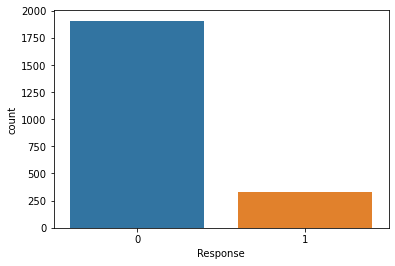

In [303]:
sns.countplot(market_comp_df['Response'])

C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'No Complain'), Text(1, 0, 'Complain')]

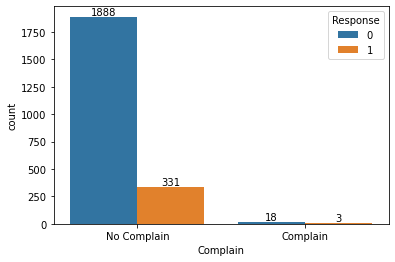

In [308]:
ax = sns.countplot(market_comp_df['Complain'],hue=market_comp_df['Response'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_xticklabels(['No Complain','Complain'])

Text(0.5, 0, 'No of Children')

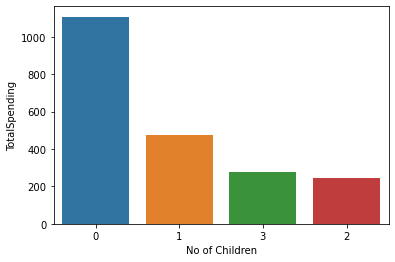

In [357]:
market_sort = market_comp_df.groupby(['Children'])['TotalSpending'].mean().reset_index().sort_values('TotalSpending',ascending=False)
ax = sns.barplot(x=market_comp_df['Children'],y=market_comp_df['TotalSpending'],ci=False,order=market_sort['Children'])
ax.set_xlabel('No of Children')

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

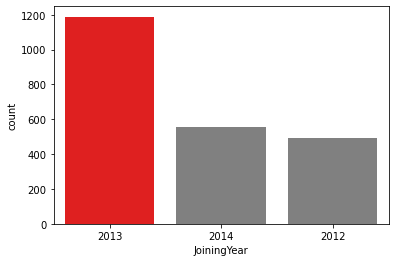

In [351]:
cols = ['grey' if (x < max(market_comp_df['JoiningYear'].value_counts())) else 'red' for x in market_comp_df['JoiningYear'].value_counts()]
sns.countplot(x='JoiningYear',palette=cols,order=market_comp_df['JoiningYear'].value_counts().index,data=market_comp_df)

[Text(0, 0, 'No Complain'), Text(1, 0, 'Complain')]

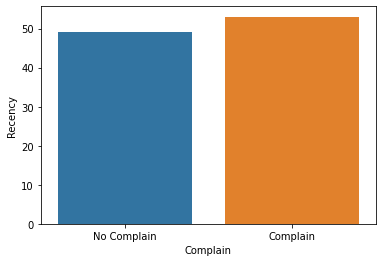

In [360]:
market_sort = market_comp_df.groupby(['Complain'])['Recency'].count().reset_index().sort_values('Recency',ascending=False)
ax = sns.barplot(x=market_comp_df['Complain'],y=market_comp_df['Recency'],ci=False,order=market_sort['Complain'])
ax.set_xticklabels(['No Complain','Complain'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='TotalSpending'>

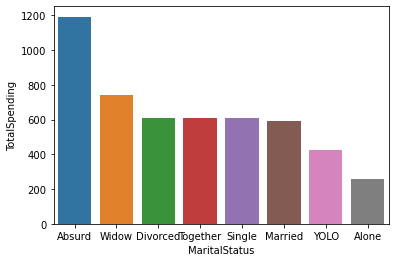

In [253]:
market_sort = market_comp_df.groupby(['MaritalStatus'])['TotalSpending'].mean().reset_index().sort_values('TotalSpending',ascending=False)

sns.barplot(x=market_comp_df['MaritalStatus'],y=market_comp_df['TotalSpending'],ci=False,order=market_sort['MaritalStatus'])

C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

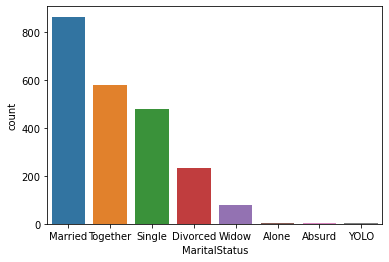

In [255]:

sns.countplot(market_comp_df['MaritalStatus'],order=market_comp_df['MaritalStatus'].value_counts().index)

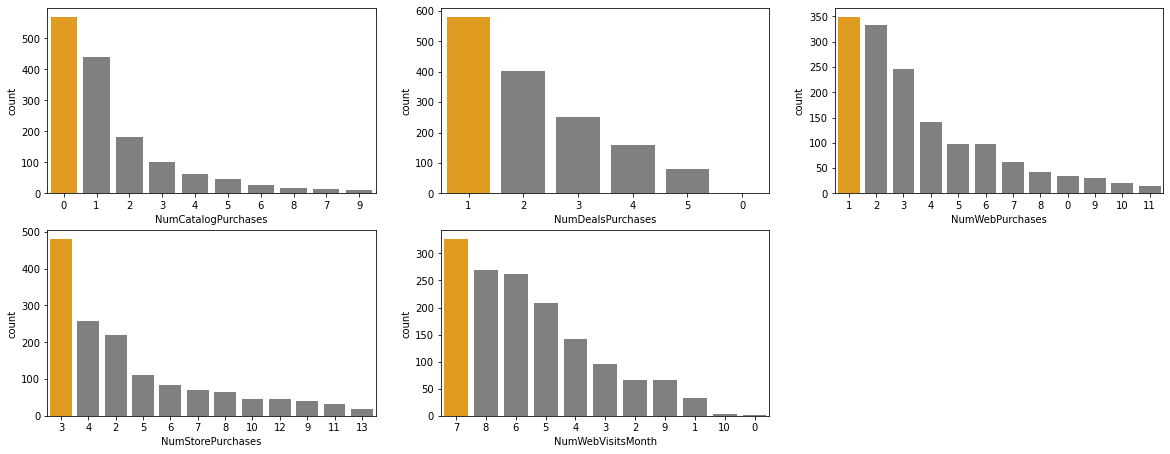

In [220]:
figure_cat = plt.figure(figsize=(20,7.5))
for ind,col in enumerate(['NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumStorePurchases','NumWebVisitsMonth']):
    cols = ['grey' if (x < max(market_comp_df[col].value_counts())) else 'orange' for x in market_comp_df[col].value_counts()]
    ax = figure_cat.add_subplot(2,3,ind+1)
    sns.countplot(x=col,palette=cols,order=market_comp_df[col].value_counts().index,data=market_comp_df)

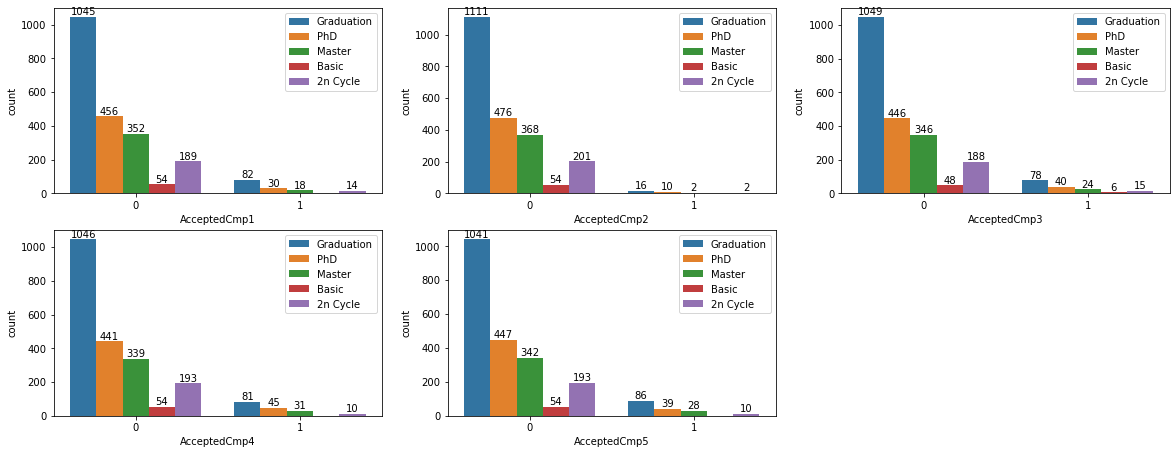

In [246]:
figure_cat = plt.figure(figsize=(20,7.5))
for ind,col in enumerate(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
    cols = ['grey' if (x < max(market_comp_df[col].value_counts())) else 'orange' for x in market_comp_df[col].value_counts()]
    ax = figure_cat.add_subplot(2,3,ind+1)
    sns.countplot(x=col,hue=market_comp_df['Education'],order=market_comp_df[col].value_counts().index,data=market_comp_df)
    for container in ax.containers:
        ax.bar_label(container)
        plt.legend(loc='upper right')

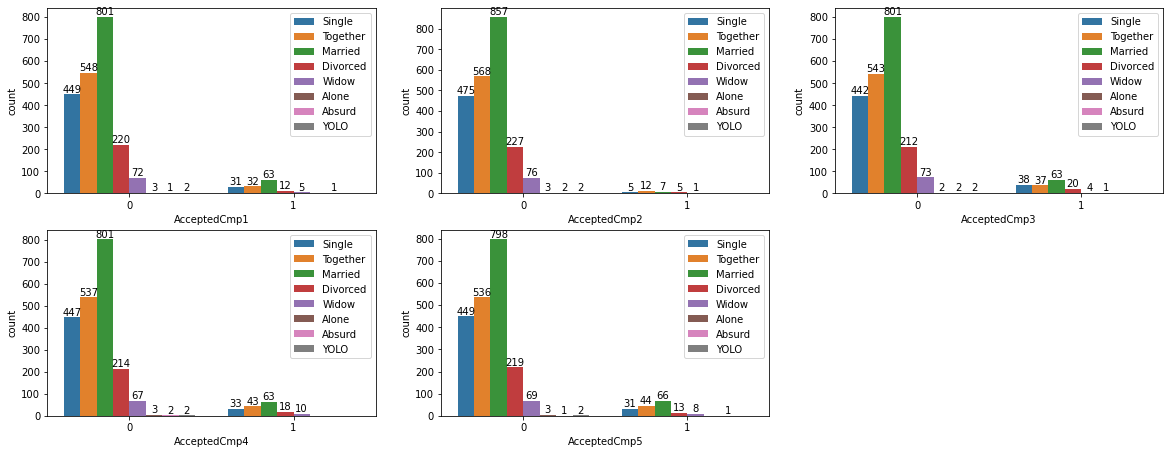

In [245]:
figure_cat = plt.figure(figsize=(20,7.5))
for ind,col in enumerate(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
    cols = ['grey' if (x < max(market_comp_df[col].value_counts())) else 'orange' for x in market_comp_df[col].value_counts()]
    ax = figure_cat.add_subplot(2,3,ind+1)
    sns.countplot(x=col,hue=market_comp_df['MaritalStatus'],order=market_comp_df[col].value_counts().index,data=market_comp_df)
    for container in ax.containers:
        ax.bar_label(container)
        plt.legend(loc='upper right')

<AxesSubplot:xlabel='Income'>

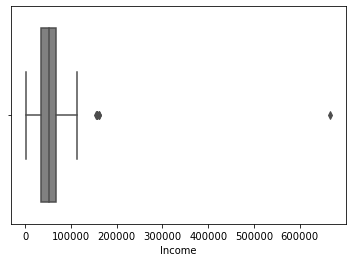

In [259]:
sns.boxplot(x=market_comp_df['Income'],color='Grey')

<AxesSubplot:xlabel='YearBirth'>

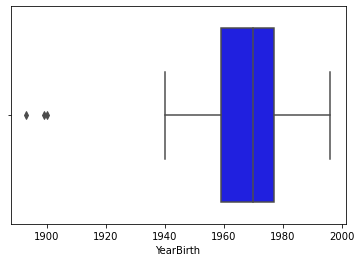

In [261]:
sns.boxplot(x=market_comp_df['YearBirth'],color='Blue')

<AxesSubplot:xlabel='TotalSpending'>

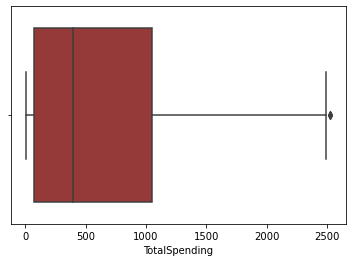

In [262]:
sns.boxplot(x=market_comp_df['TotalSpending'],color='Brown')

# Handling Outliers

In [258]:
from operator import add
def find_anomalies(data):
    anomalies = []
    
    for col in data:
        Q1 = np.percentile(data[col], 25,
                interpolation = 'midpoint')
 
        Q3 = np.percentile(data[col], 75,
                        interpolation = 'midpoint')
        IQR = Q3 - Q1
        
        print('Col:',col)
        
#         print('Q1:',Q1,'Q3:',Q3,'IQR:',IQR)

        upper = np.where(data[col] >= (Q3+1.5*IQR))

        lower = np.where(data[col] <= (Q1-1.5*IQR))

#         print(lower[0])
#         print(upper[0])
        
        try:
            if len(lower[0]) != 0 and len(lower[0]) > 0:
                for low_val in lower[0]:
                    anomalies.append(low_val)
            if len(upper[0]) != 0 and len(upper[0]) > 0:
                for up_val in upper[0]:
                    anomalies.append(up_val)
#             print(anomalies_lower)
#             print(anomalies_upper)
        except:
            pass
#     print(list(set(anomalies)))
    
    return list(set(anomalies))
    

In [259]:
outl_list = find_anomalies(market_comp_df[['YearBirth','Age','Income','TotalSpending','Recency']])

Col: YearBirth
Col: Age
Col: Income
Col: TotalSpending
Col: Recency


In [27]:
market_comp_df.drop(outl_list,inplace=True)

In [28]:
market_comp_df.shape

(2226, 33)

In [260]:
market_comp_df.drop(['ID','ZCostContact','ZRevenue','Kidhome','Teenhome','DTCustomer'],axis=1,inplace=True)

# One Hot Encoding

In [261]:
one_hot = pd.get_dummies(market_comp_df.select_dtypes(include='object'), drop_first = True)
market_comp_df_new = pd.concat([market_comp_df, one_hot], axis = 1)
market_comp_df_new.drop(market_comp_df.select_dtypes(include='object'), axis = 1, inplace = True)

In [262]:
market_comp_df_new['MaritalStatus_Spousal relationship'] = market_comp_df_new['MaritalStatus_Spousal relationship'].astype('int64')

In [263]:
market_comp_df_new.dtypes

YearBirth                               int64
Education                               int64
Income                                float64
Recency                                 int64
MntWines                                int64
MntFruits                               int64
MntMeatProducts                         int64
MntFishProducts                         int64
MntSweetProducts                        int64
MntGoldProds                            int64
NumDealsPurchases                       int64
NumWebPurchases                         int64
NumCatalogPurchases                     int64
NumStorePurchases                       int64
NumWebVisitsMonth                       int64
AcceptedCmp3                            int64
AcceptedCmp4                            int64
AcceptedCmp5                            int64
AcceptedCmp1                            int64
AcceptedCmp2                            int64
Complain                                int64
Response                          

In [264]:
from sklearn.model_selection import train_test_split

# Scaling and Standardization

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [266]:
scaler.fit(market_comp_df_new.drop(['Response','YearBirth','TotalSpending'],axis=1))
scaled_features = scaler.transform(market_comp_df_new.drop(['Response','YearBirth','TotalSpending'],axis=1))

In [267]:
market_comp_scaled = pd.DataFrame(scaled_features,columns=market_comp_df_new.columns[~market_comp_df_new.columns.isin(['Response','YearBirth','TotalSpending'])])
market_comp_scaled.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,JoiningYear,MaritalStatus_Spousal relationship
0,-0.427121,0.235850,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.985345,-1.264505,-1.502225,-1.346874
1,-0.427121,-0.234698,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,1.235733,1.396361,1.420036,-1.346874
2,-0.427121,0.773466,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,0.317643,-1.264505,-0.041094,0.742460
3,-0.427121,-1.020595,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-1.268149,0.065928,1.420036,0.742460
4,1.787581,0.242035,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,...,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-1.017761,0.065928,1.420036,0.742460


In [268]:
X = market_comp_scaled
y = market_comp_df_new['Response']

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [270]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1568, 24) (1568,) (672, 24) (672,)


# SMOTEENN - Resampling

In [271]:
from collections import Counter
from imblearn.combine import SMOTEENN

In [272]:
res_smt = SMOTEENN(random_state=369)
X_train_res, y_train_res = res_smt.fit_resample(X_train, y_train)
print('Resampled %s' % Counter(y_train_res))

Resampled Counter({1: 1267, 0: 955})


# Logistic Regression

In [274]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [282]:
sfs_md = SFS(LogisticRegression(random_state=369,solver='liblinear',max_iter=1000,penalty='l1'),
          k_features=(10,20),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [283]:
sfs_md.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       penalty='l1',
                                                       random_state=369,
                                                       solver='liblinear'),
                          floating=True, k_features=(10, 20),
                          scoring='accuracy')

In [284]:
sfs_md.k_feature_names_

('Education',
 'Income',
 'Recency',
 'MntWines',
 'MntMeatProducts',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Age',
 'Children',
 'JoiningYear',
 'MaritalStatus_Spousal relationship')

In [285]:
pd.DataFrame.from_dict(sfs_md.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.6831460674157304, 0.6539325842696629, 0.675...",0.687686,"(MntGoldProds,)",0.034906,0.027158,0.013579
2,"(8, 19)","[0.6853932584269663, 0.6561797752808989, 0.682...",0.687684,"(MntGoldProds, Complain)",0.030427,0.023674,0.011837
3,"(8, 11, 22)","[0.7235955056179775, 0.7393258426966293, 0.727...",0.740332,"(MntGoldProds, NumCatalogPurchases, JoiningYear)",0.020088,0.015629,0.007815
4,"(2, 8, 11, 22)","[0.7662921348314606, 0.7865168539325843, 0.768...",0.776778,"(Recency, MntGoldProds, NumCatalogPurchases, J...",0.01055,0.008208,0.004104
5,"(2, 8, 11, 16, 22)","[0.7955056179775281, 0.8202247191011236, 0.792...",0.803777,"(Recency, MntGoldProds, NumCatalogPurchases, A...",0.013195,0.010266,0.005133
6,"(2, 8, 11, 13, 16, 22)","[0.8067415730337079, 0.8674157303370786, 0.804...",0.819516,"(Recency, MntGoldProds, NumCatalogPurchases, N...",0.031558,0.024553,0.012276
7,"(2, 5, 8, 11, 13, 16, 22)","[0.8179775280898877, 0.8764044943820225, 0.846...",0.843381,"(Recency, MntMeatProducts, MntGoldProds, NumCa...",0.025523,0.019858,0.009929
8,"(2, 5, 8, 11, 13, 14, 16, 22)","[0.8269662921348314, 0.903370786516854, 0.8423...",0.854626,"(Recency, MntMeatProducts, MntGoldProds, NumCa...",0.033287,0.025898,0.012949
9,"(0, 2, 5, 8, 11, 13, 14, 16, 22)","[0.8539325842696629, 0.9056179775280899, 0.849...",0.866775,"(Education, Recency, MntMeatProducts, MntGoldP...",0.028843,0.022441,0.01122
10,"(0, 2, 5, 11, 12, 13, 14, 15, 16, 22)","[0.851685393258427, 0.9101123595505618, 0.8626...",0.872179,"(Education, Recency, MntMeatProducts, NumCatal...",0.025603,0.01992,0.00996


In [286]:
X_train_fs = X_train_res[X_train[['Education',
 'Income',
 'Recency',
 'MntWines',
 'MntMeatProducts',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Age',
 'Children',
 'JoiningYear',
 'MaritalStatus_Spousal relationship']].columns]

In [287]:
logit_reg = LogisticRegression(random_state=369,solver='liblinear',max_iter=1000,penalty='l1')

In [288]:
logit_reg.fit(X_train_fs,y_train_res)

LogisticRegression(max_iter=1000, penalty='l1', random_state=369,
                   solver='liblinear')

In [289]:
logit_reg.coef_

array([[ 0.80497551, -0.05958196, -1.31586661, -0.14783003,  1.37708093,
         0.56070585,  0.45527778, -0.93569599,  0.44319423,  1.04608607,
         0.38793955,  0.84168441,  0.56410663,  0.73071073, -0.04654916,
        -0.25841794,  0.        , -1.24882726, -0.71905413]])

In [290]:
logit_reg.intercept_

array([-0.72785964])

In [291]:
coeff_info = pd.DataFrame(logit_reg.coef_).T
coeff_info['Coefficients'] = X_train_fs.columns
coeff_info

,0,Coefficients
0,0.804976,Education
1,-0.059582,Income
2,-1.315867,Recency
3,-0.147830,MntWines
4,1.377081,MntMeatProducts
5,0.560706,NumDealsPurchases
6,0.455278,NumCatalogPurchases
7,-0.935696,NumStorePurchases
8,0.443194,NumWebVisitsMonth
9,1.046086,AcceptedCmp3


In [292]:
X_test[X_train_fs.columns]

,Education,Income,Recency,MntWines,MntMeatProducts,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Children,JoiningYear,MaritalStatus_Spousal relationship
358,-0.427121,0.512538,0.548785,0.965952,0.044535,-0.685887,0.115638,-0.243114,-1.367014,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,10.279429,2.153823,-1.264505,-0.041094,0.742460
1547,-0.427121,-0.847561,0.030758,-0.751617,-0.518246,-0.685887,-0.910898,-0.858455,1.106087,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.484568,-1.264505,-1.502225,-1.346874
1061,-0.427121,0.517446,-0.521805,1.304711,0.062260,-0.168236,1.142175,1.602907,-0.130463,3.56964,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.901882,1.396361,-0.041094,0.742460
1419,-0.427121,-1.100669,-1.592395,-0.843735,-0.668912,0.349414,-0.910898,-0.550785,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-0.350059,1.396361,1.420036,0.742460
1607,-0.427121,-0.038962,-0.729016,0.113111,0.279396,1.384715,0.799996,-0.550785,1.518271,3.56964,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-1.768926,0.065928,-0.041094,-1.346874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-0.427121,-0.383794,-0.659946,-0.439602,-0.491658,-0.168236,-0.226541,0.372226,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,1.235733,0.065928,-0.041094,-1.346874
2038,-0.427121,-0.540471,1.653911,-0.870479,-0.580285,-0.685887,-0.910898,-0.858455,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,-1.268149,0.065928,-0.041094,0.742460
2087,-0.427121,1.101023,-1.488790,1.578096,0.944099,-0.685887,2.168711,0.372226,-1.367014,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.818419,0.065928,1.420036,0.742460
932,1.787581,0.507631,-0.694481,1.530550,-0.420756,-0.168236,-0.226541,1.295237,0.693904,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,1.486121,0.065928,-1.502225,-1.346874


In [294]:
cat_pred = logit_reg.predict(X_test[X_train_fs.columns])

In [295]:
from sklearn.metrics import classification_report, confusion_matrix

In [296]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,cat_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,cat_pred))

Confusion Matrix::


[[437 142]
 [ 13  80]]


Classification Report::


              precision    recall  f1-score   support

           0       0.97      0.75      0.85       579
           1       0.36      0.86      0.51        93

    accuracy                           0.77       672
   macro avg       0.67      0.81      0.68       672
weighted avg       0.89      0.77      0.80       672



In [297]:
logit_reg.score(X_test[X_train_fs.columns],y_test)

0.7693452380952381

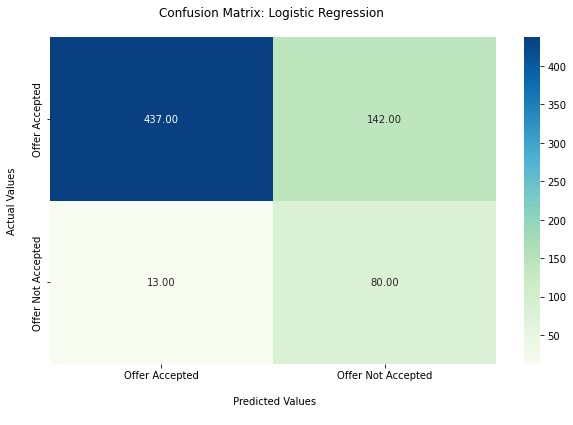

In [300]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,cat_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix: Logistic Regression \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Offer Accepted','Offer Not Accepted'])
fx.yaxis.set_ticklabels(['Offer Accepted','Offer Not Accepted'])
plt.show()

In [199]:
from sklearn.metrics import roc_auc_score,roc_curve

In [200]:
pred_prob = logit_reg.predict_proba(X_test[X_train_fs.columns])

In [201]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [202]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [203]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.8655755730356085

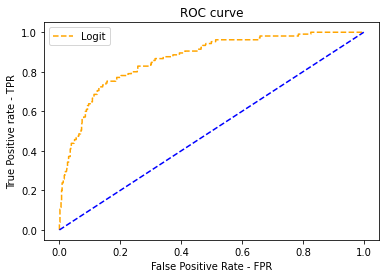

In [204]:
# roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logit')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate - FPR')
plt.ylabel('True Positive rate - TPR')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

# Support Vector Machine

In [301]:
from sklearn.svm import SVC

In [302]:
sfs_md_svm = SFS(SVC(kernel='linear',gamma='scale',degree=2,random_state=369),
          k_features=(10,20),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [303]:
sfs_md_svm.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=SVC(degree=2, kernel='linear',
                                        random_state=369),
                          floating=True, k_features=(10, 20),
                          scoring='accuracy')

In [304]:
sfs_md_svm.k_feature_names_

('Education',
 'Recency',
 'MntWines',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Age',
 'JoiningYear',
 'MaritalStatus_Spousal relationship')

In [305]:
pd.DataFrame.from_dict(sfs_md_svm.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.6561797752808989, 0.6651685393258427, 0.653...",0.662017,"(MntWines,)",0.008372,0.006513,0.003257
2,"(2, 3)","[0.7438202247191011, 0.7640449438202247, 0.752...",0.746618,"(Recency, MntWines)",0.013463,0.010474,0.005237
3,"(2, 3, 22)","[0.7752808988764045, 0.8089887640449438, 0.774...",0.790277,"(Recency, MntWines, JoiningYear)",0.017122,0.013322,0.006661
4,"(2, 3, 14, 22)","[0.7910112359550562, 0.8247191011235955, 0.799...",0.813687,"(Recency, MntWines, AcceptedCmp3, JoiningYear)",0.020398,0.01587,0.007935
5,"(2, 3, 14, 22, 23)","[0.8292134831460675, 0.8629213483146068, 0.801...",0.830319,"(Recency, MntWines, AcceptedCmp3, JoiningYear,...",0.027247,0.021199,0.0106
6,"(0, 2, 3, 14, 22, 23)","[0.8426966292134831, 0.8674157303370786, 0.824...",0.844725,"(Education, Recency, MntWines, AcceptedCmp3, J...",0.020728,0.016127,0.008064
7,"(0, 2, 3, 9, 14, 22, 23)","[0.849438202247191, 0.8696629213483146, 0.8220...",0.848775,"(Education, Recency, MntWines, NumDealsPurchas...",0.022471,0.017483,0.008742
8,"(0, 2, 3, 9, 14, 16, 22, 23)","[0.8449438202247191, 0.8741573033707866, 0.826...",0.856883,"(Education, Recency, MntWines, NumDealsPurchas...",0.024132,0.018775,0.009388
9,"(0, 2, 3, 9, 14, 16, 17, 22, 23)","[0.8471910112359551, 0.8921348314606742, 0.844...",0.865883,"(Education, Recency, MntWines, NumDealsPurchas...",0.023344,0.018163,0.009081
10,"(0, 2, 3, 4, 9, 14, 16, 17, 22, 23)","[0.8561797752808988, 0.8943820224719101, 0.860...",0.872184,"(Education, Recency, MntWines, MntFruits, NumD...",0.018437,0.014345,0.007172


In [307]:
X_train_fs2 = X_train_res[X_train[['Education',
 'Recency',
 'MntWines',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Age',
 'JoiningYear',
 'MaritalStatus_Spousal relationship']].columns]

In [308]:
svm_model = SVC(kernel='linear',gamma='scale',degree=2,random_state=369)
svm_model.fit(X_train_fs2, y_train_res)

SVC(degree=2, kernel='linear', random_state=369)

In [309]:
svm_model.coef_

array([[ 0.53396071, -0.8417011 , -0.28767772,  0.89623454, -0.09828274,
         0.20169954, -0.16242026,  0.45176532,  0.50106107, -0.55589702,
         0.45290739,  0.67016878,  0.2744788 ,  0.58145894,  0.37290903,
         0.32218996,  0.03686576, -0.15749736, -0.90197147, -0.44736179]])

In [310]:
svm_model.intercept_

array([-0.53519179])

In [312]:
coeff_info_svm = pd.DataFrame(svm_model.coef_).T
coeff_info_svm['Coefficients'] = X_train_fs2.columns
coeff_info_svm

,0,Coefficients
0,0.533961,Education
1,-0.841701,Recency
2,-0.287678,MntWines
3,0.896235,MntMeatProducts
4,-0.098283,MntFishProducts
5,0.201700,MntSweetProducts
6,-0.162420,MntGoldProds
7,0.451765,NumDealsPurchases
8,0.501061,NumCatalogPurchases
9,-0.555897,NumStorePurchases


In [314]:
cat_pred_svm = svm_model.predict(X_test[X_train_fs2.columns])

In [315]:
from sklearn.metrics import classification_report, confusion_matrix

In [316]:
print('Confusion Matrix:SVM:')
print('\n')
print(confusion_matrix(y_test,cat_pred_svm))
print('\n')
print('Classification Report:SVM:')
print('\n')
print(classification_report(y_test,cat_pred_svm))

Confusion Matrix:SVM:


[[431 148]
 [ 14  79]]


Classification Report:SVM:


              precision    recall  f1-score   support

           0       0.97      0.74      0.84       579
           1       0.35      0.85      0.49        93

    accuracy                           0.76       672
   macro avg       0.66      0.80      0.67       672
weighted avg       0.88      0.76      0.79       672



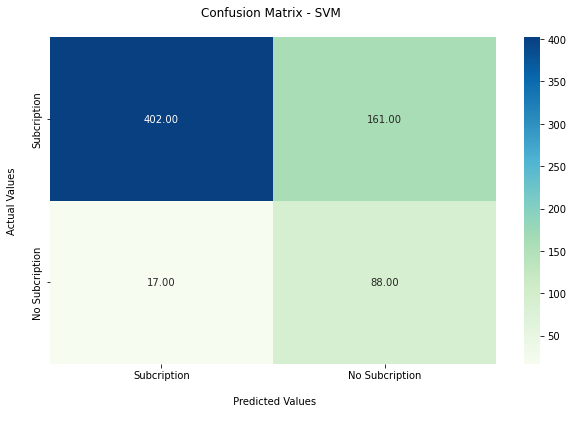

In [218]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,cat_pred_svm), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix - SVM \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Subcription','No Subcription'])
fx.yaxis.set_ticklabels(['Subcription','No Subcription'])
plt.show()

## Hyperparameter tuning

In [323]:
from sklearn.model_selection import GridSearchCV

paramaters = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']} 
  
grid_cv = GridSearchCV(SVC(), paramaters, refit = True, verbose = 3)

grid_cv.fit(X_train_fs2, y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.609 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.613 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.883 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.863 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.885 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.876 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.874 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [324]:
grid_cv.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [325]:
grid_cv.best_estimator_

SVC(C=100, gamma=0.1)

In [326]:
best_pred = grid_cv.predict(X_test[X_train_fs2.columns])

In [327]:
print('Confusion Matrix:SVM:')
print('\n')
print(confusion_matrix(y_test,best_pred))
print('\n')
print('Classification Report:SVM:')
print('\n')
print(classification_report(y_test,best_pred))

Confusion Matrix:SVM:


[[496  83]
 [ 24  69]]


Classification Report:SVM:


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       579
           1       0.45      0.74      0.56        93

    accuracy                           0.84       672
   macro avg       0.70      0.80      0.73       672
weighted avg       0.88      0.84      0.86       672



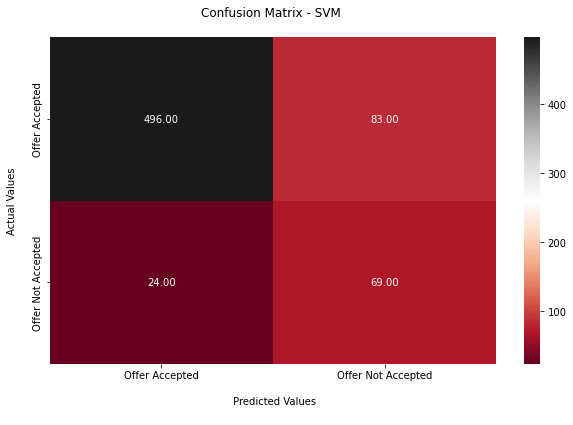

In [333]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,best_pred), annot=True, fmt=".2f",cmap="RdGy")
fx.set_title('Confusion Matrix - SVM \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Offer Accepted','Offer Not Accepted'])
fx.yaxis.set_ticklabels(['Offer Accepted','Offer Not Accepted'])
plt.show()